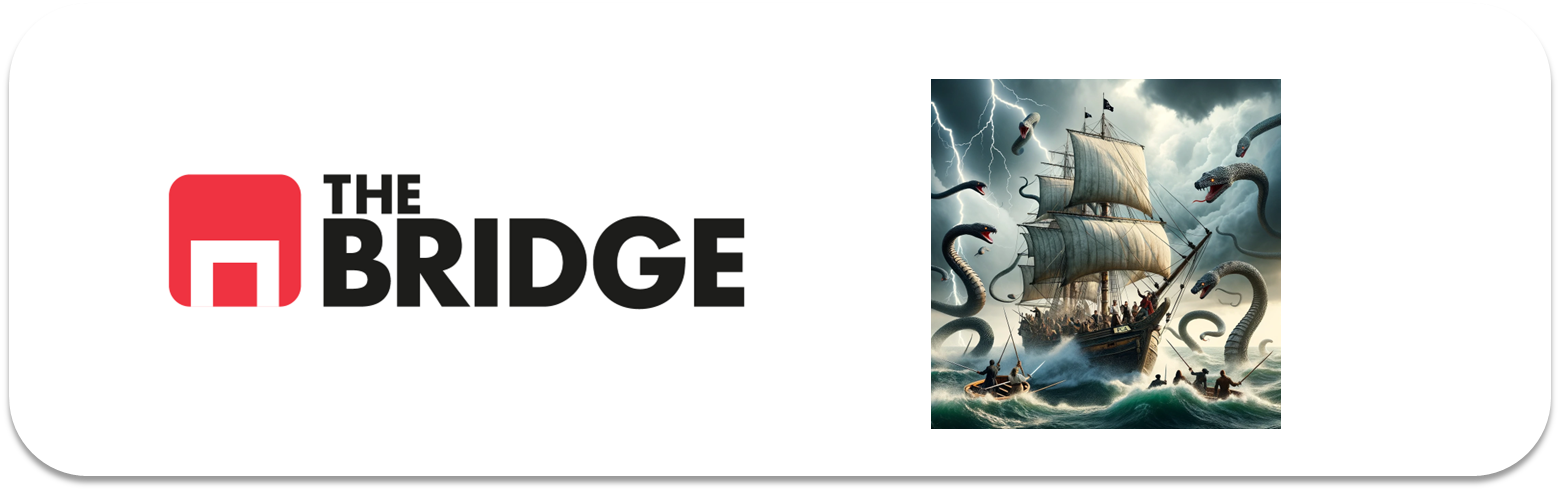

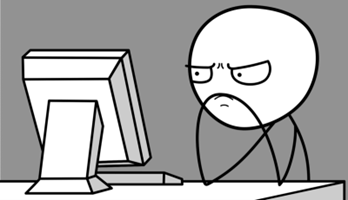

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import Toolbox_ML as tlb
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, recall_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.feature_selection import VarianceThreshold


### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df = pd.read_csv("./data/breastcancer-winsconsin.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
tlb.describe_df(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
Tipos,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
Valores Únicos,569,2,456,479,522,539,474,537,537,542,...,511,514,544,411,529,539,492,500,535,0
% Cardinalidad,100.0,0.35,80.14,84.18,91.74,94.73,83.3,94.38,94.38,95.25,...,89.81,90.33,95.61,72.23,92.97,94.73,86.47,87.87,94.02,0.0


### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [5]:
df = df.drop(columns=["id","Unnamed: 32"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [6]:
target = "diagnosis"
df[target].value_counts(True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [7]:
target = "diagnosis"
train_set, test_set = train_test_split(df, stratify=df[target], test_size=0.2, random_state=42)

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [8]:
features = [col for col in df.columns if col!=target]

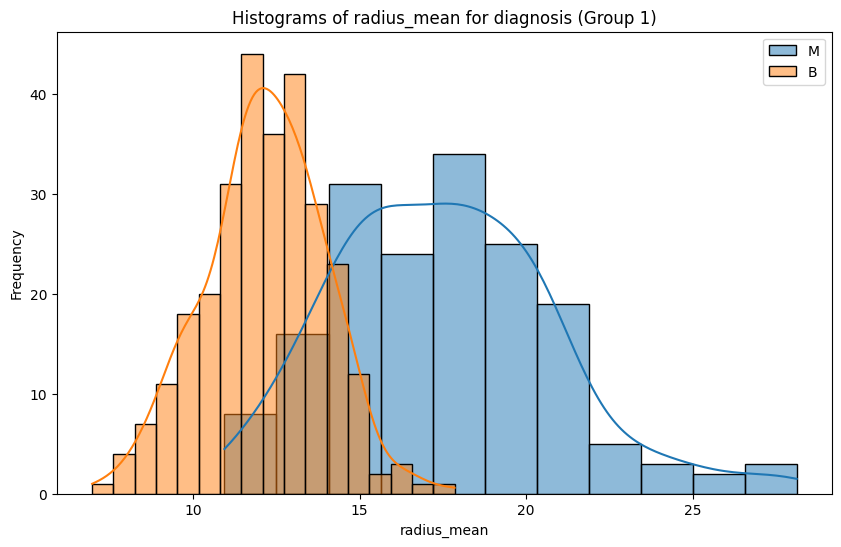

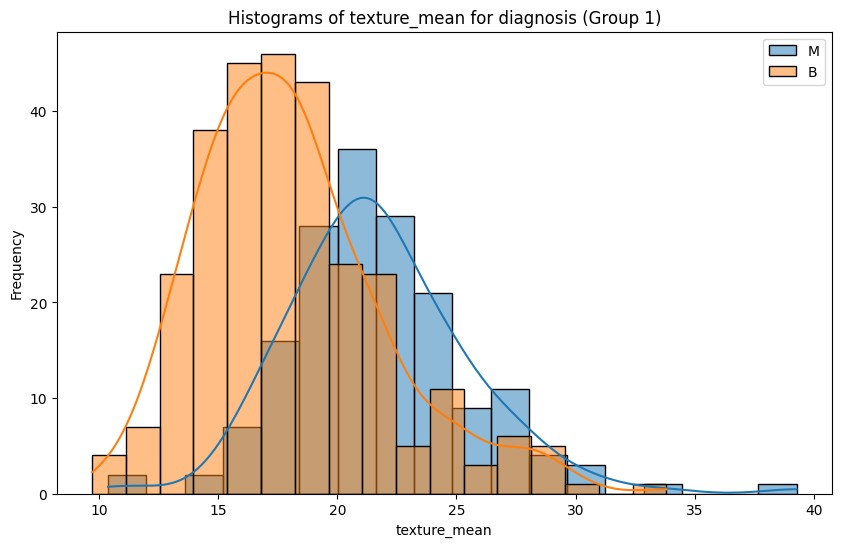

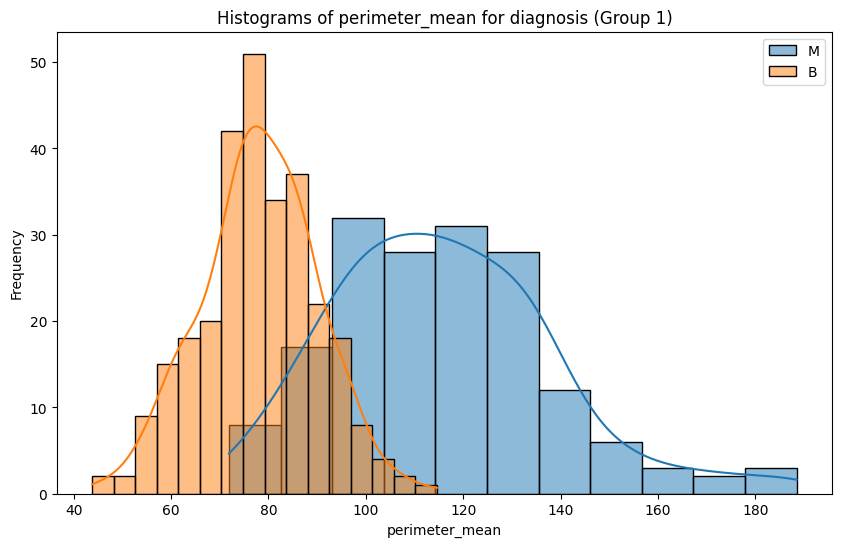

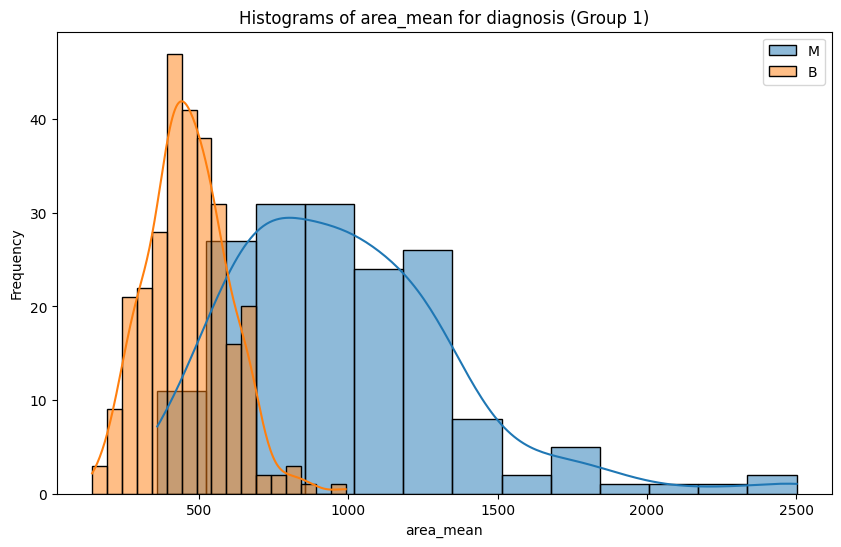

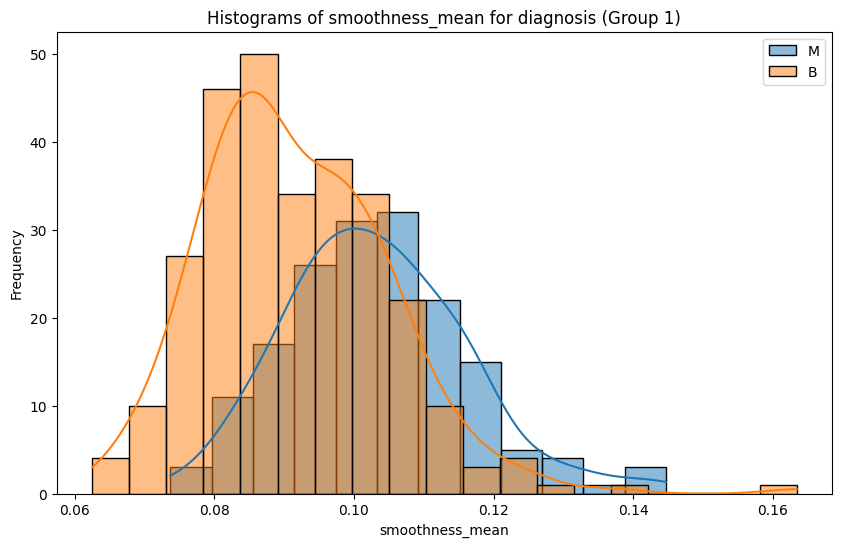

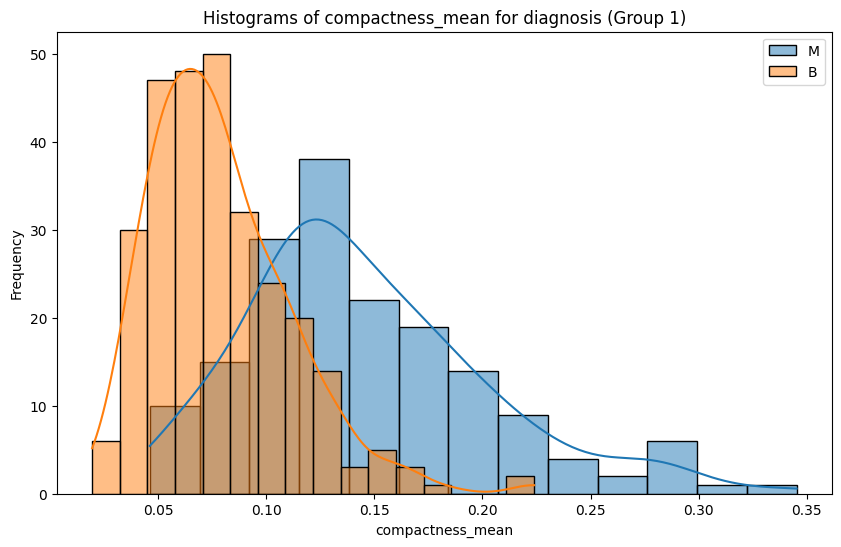

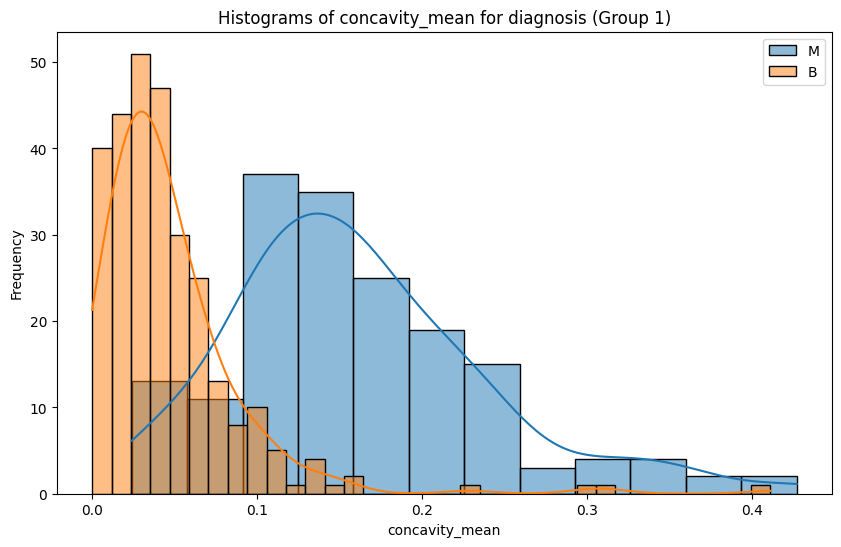

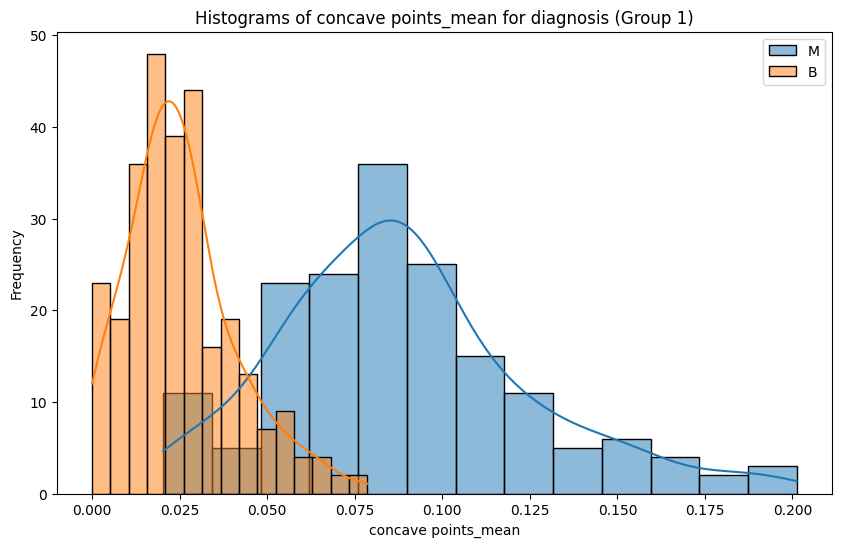

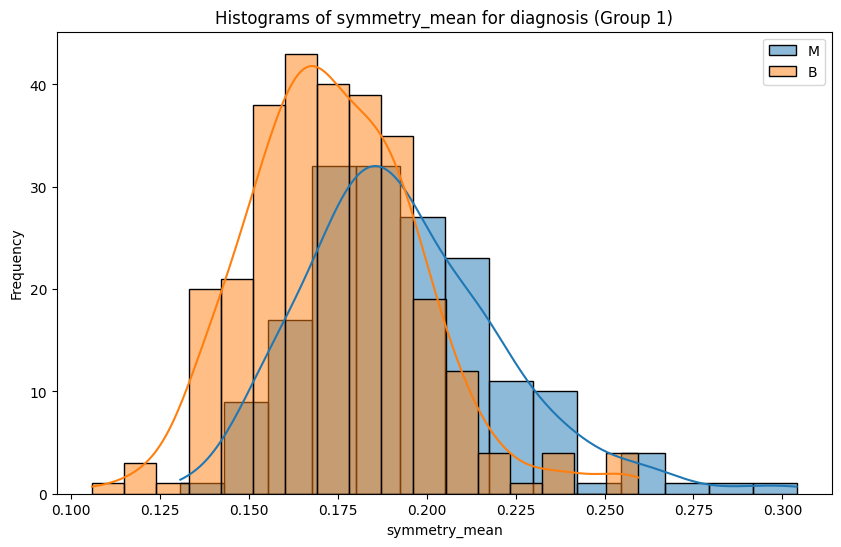

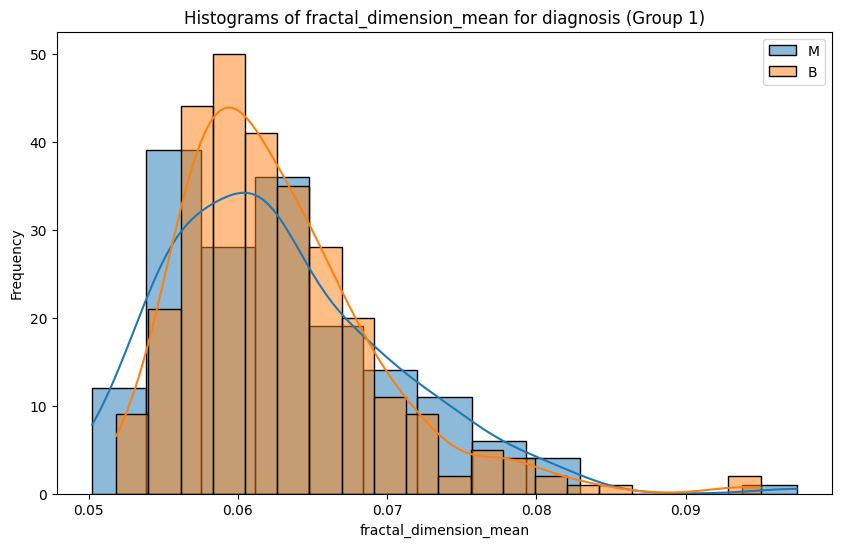

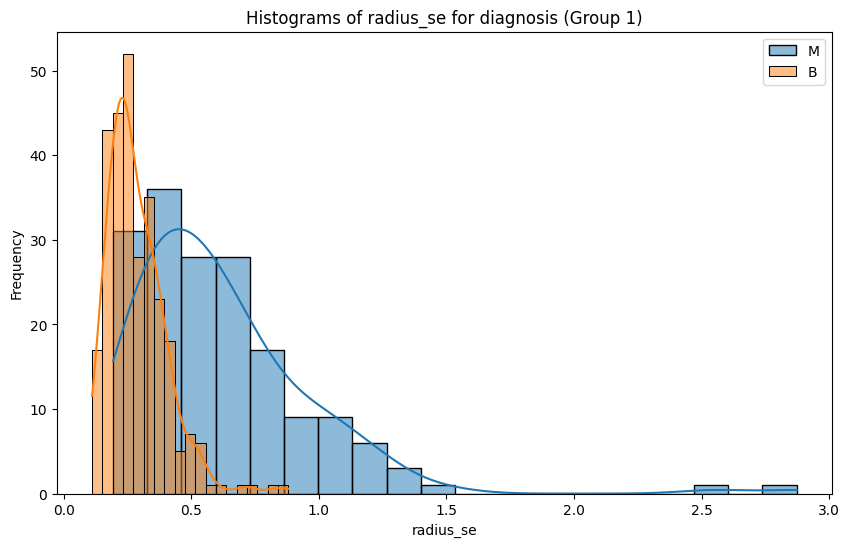

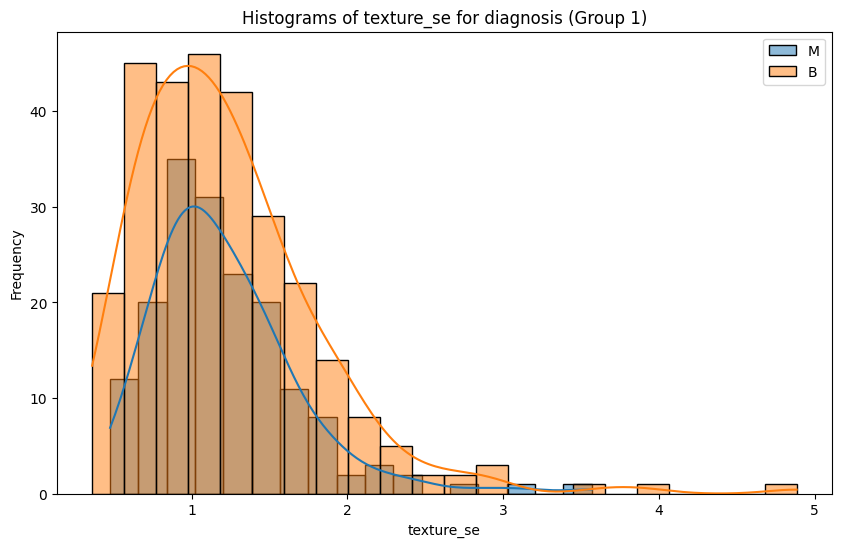

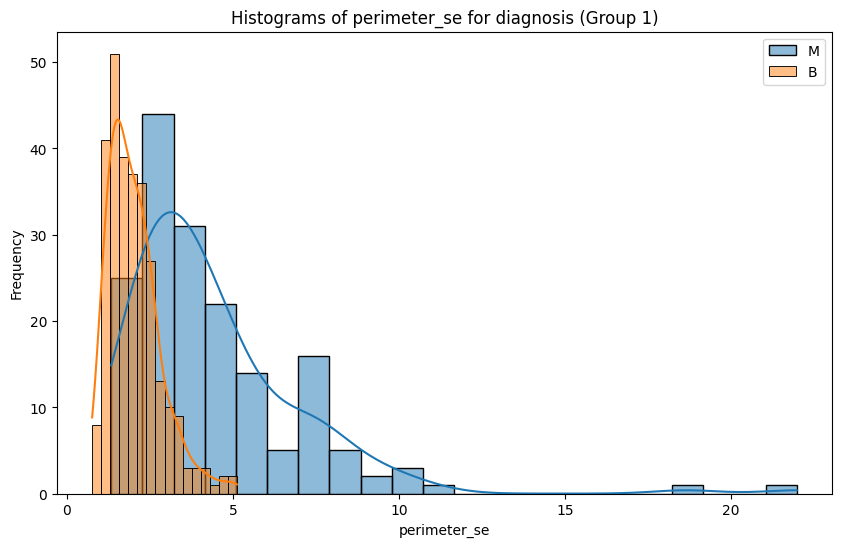

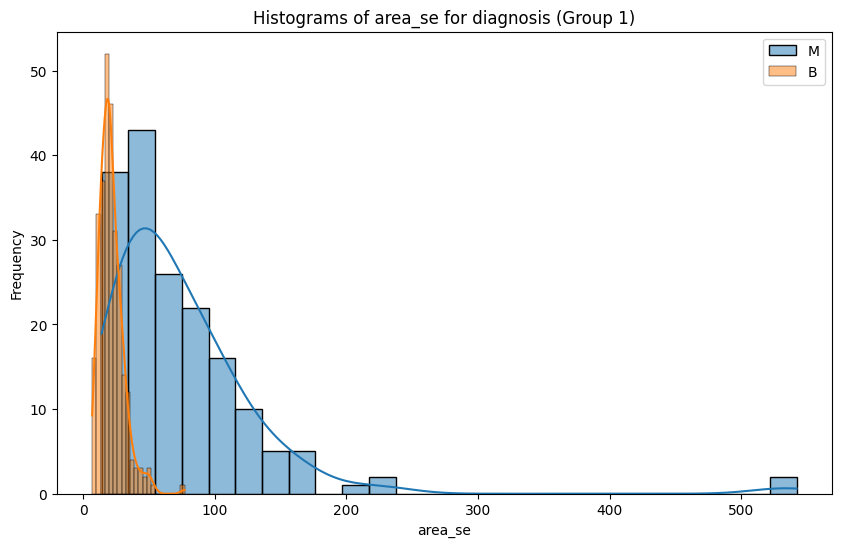

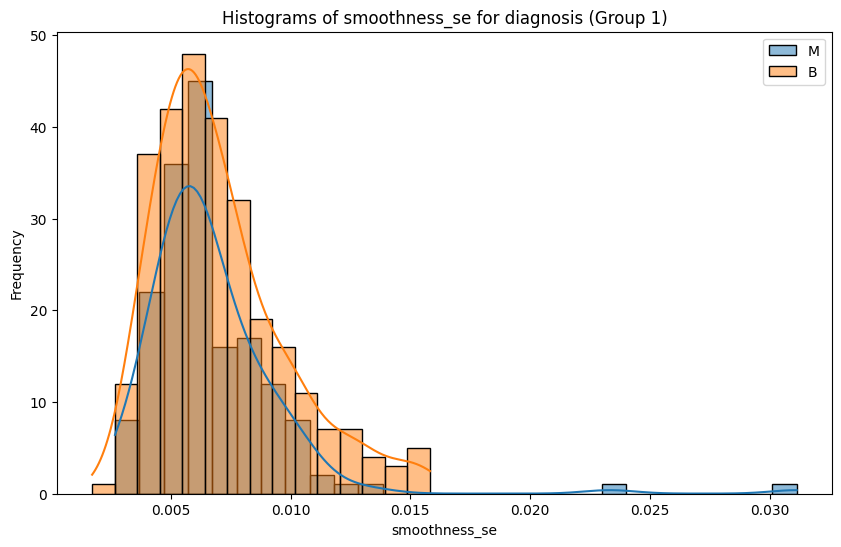

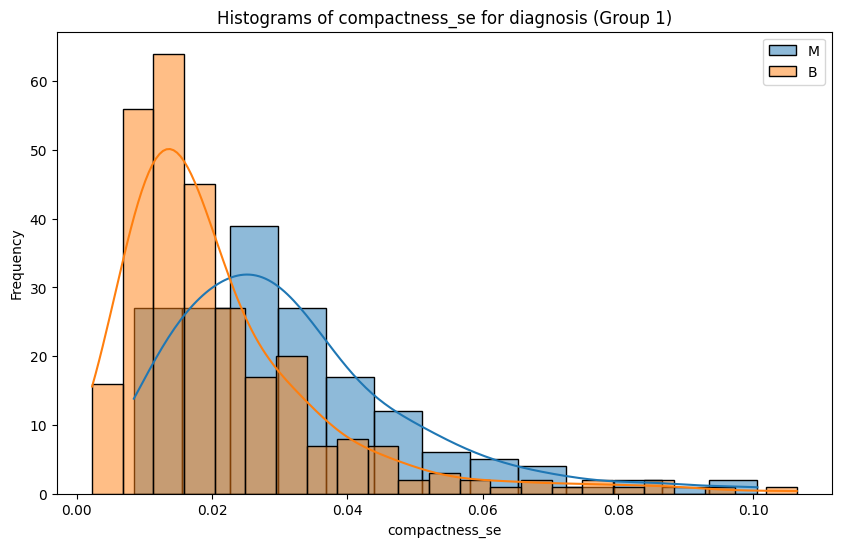

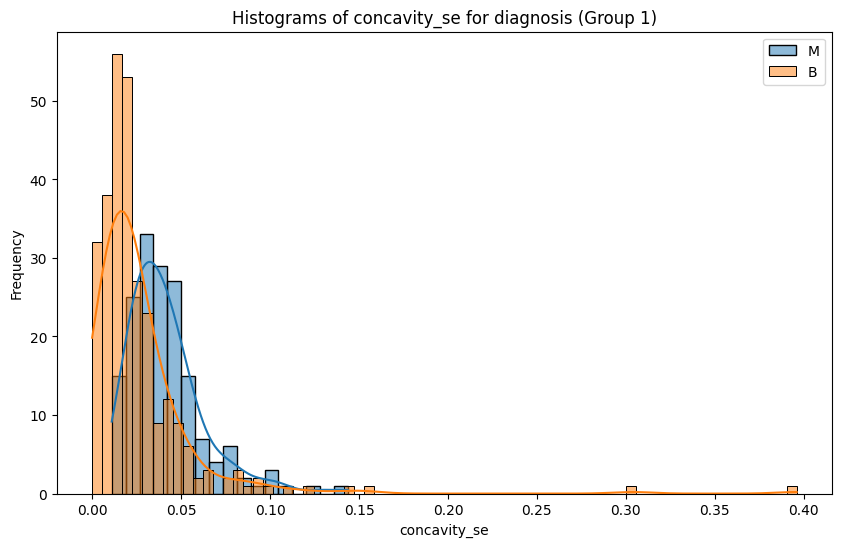

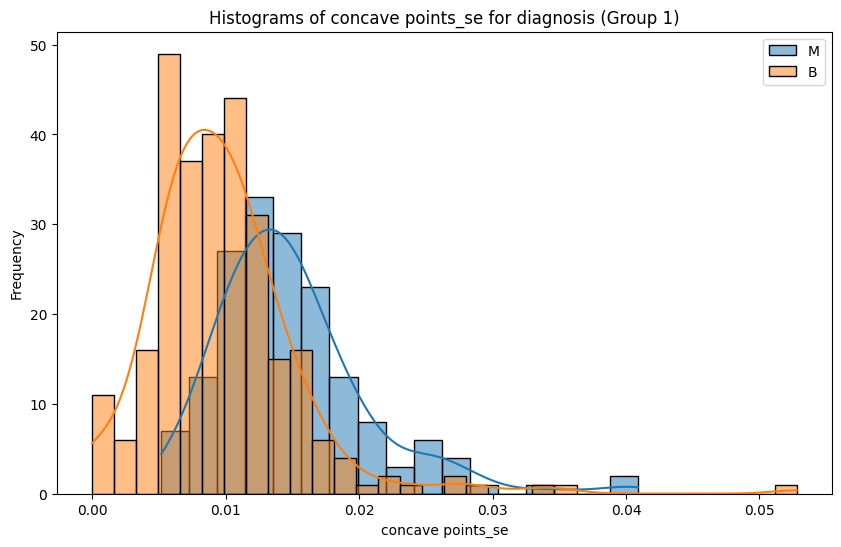

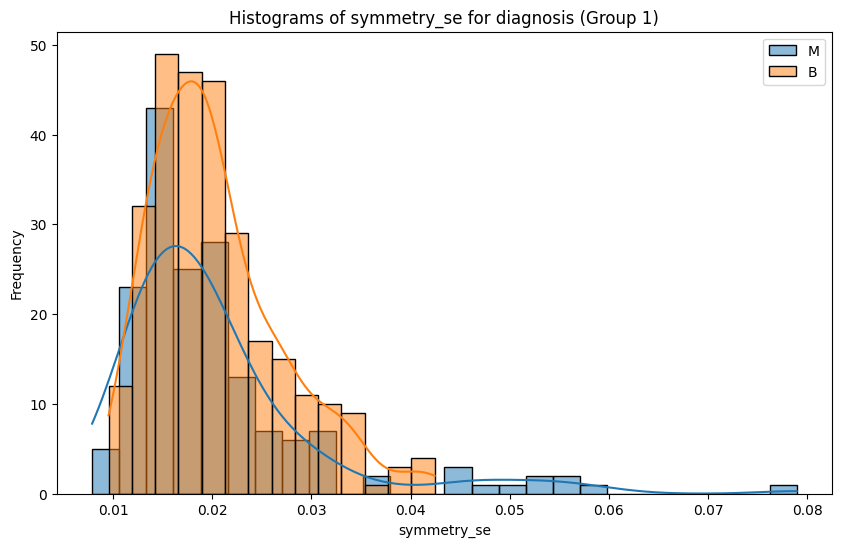

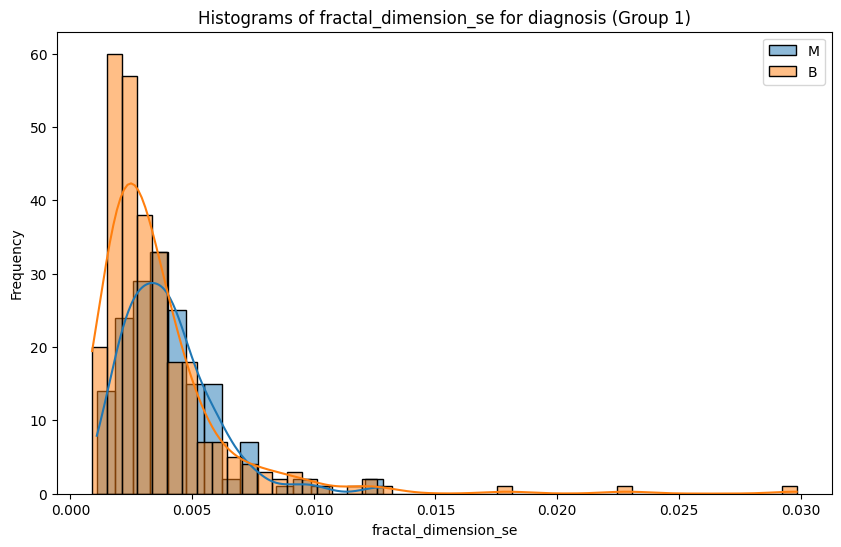

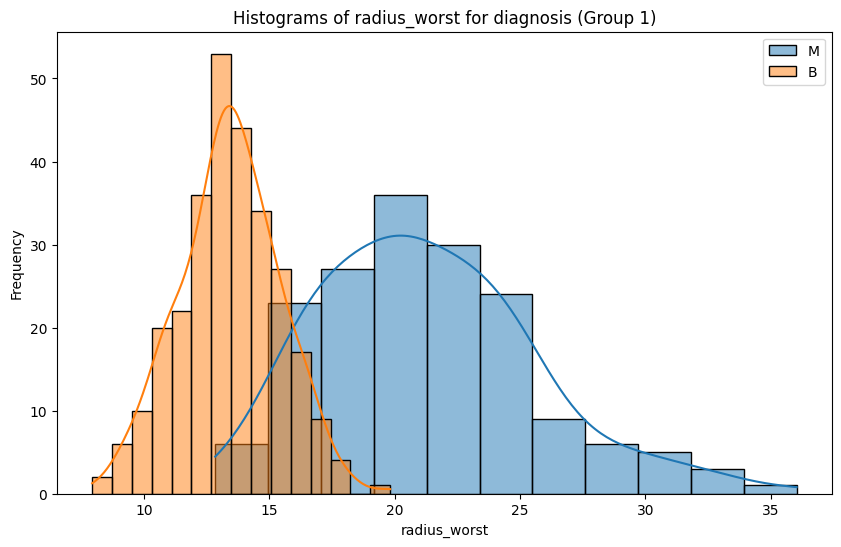

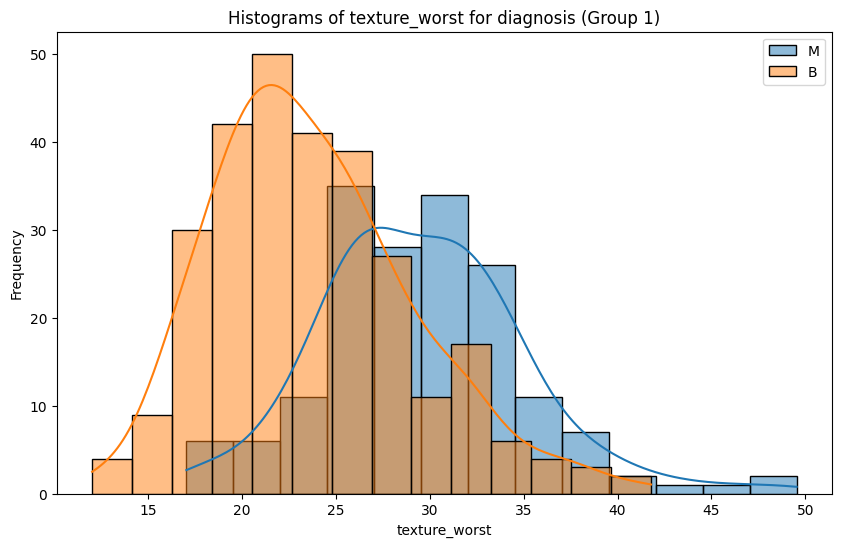

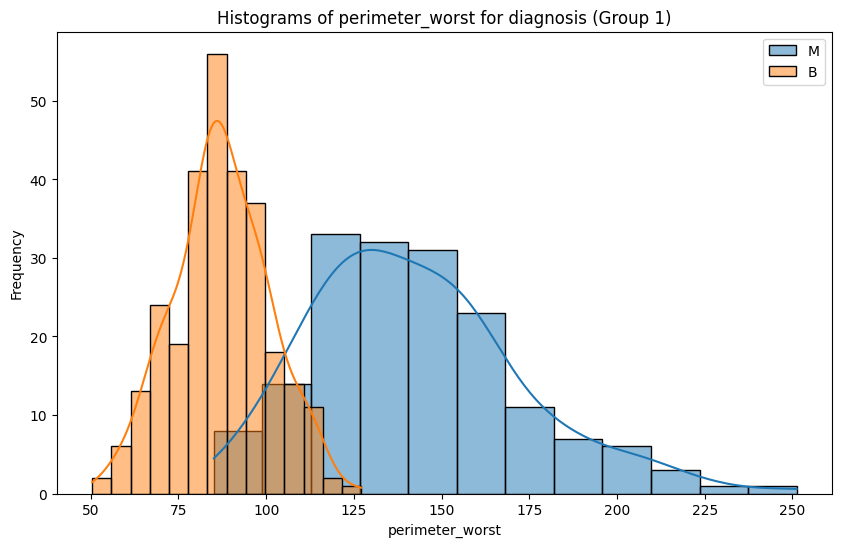

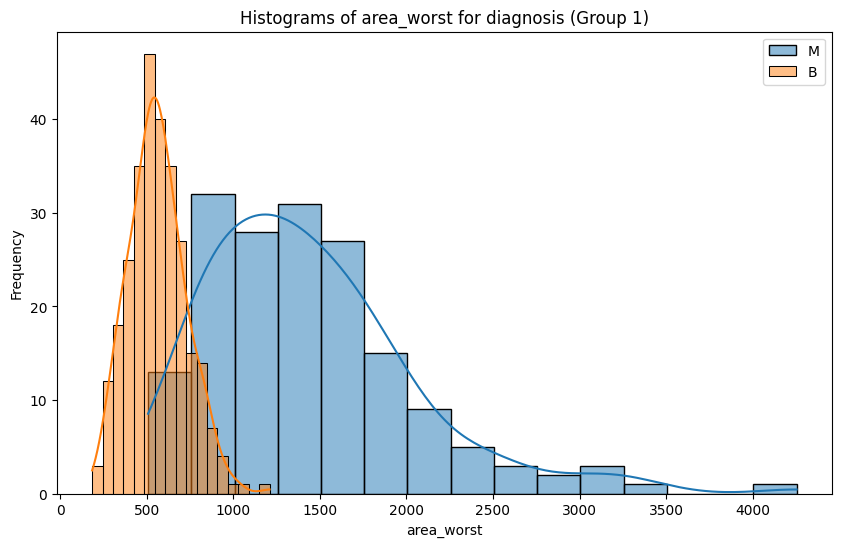

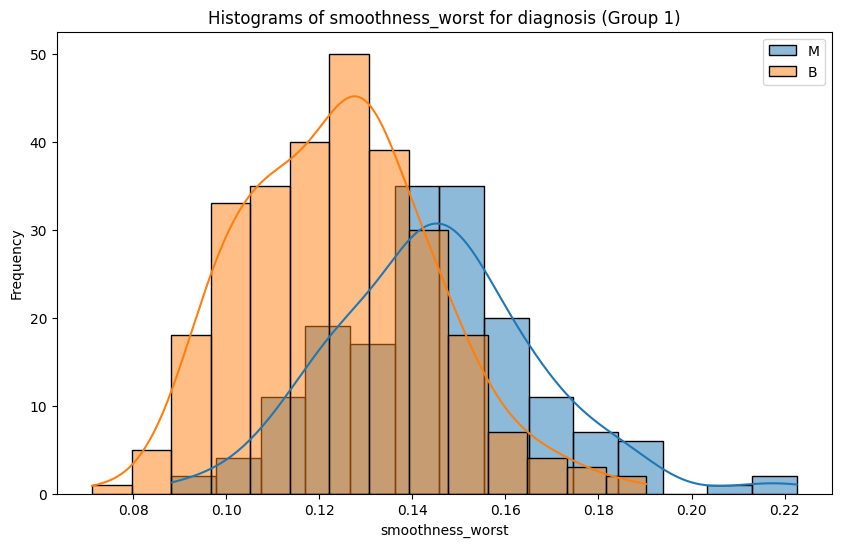

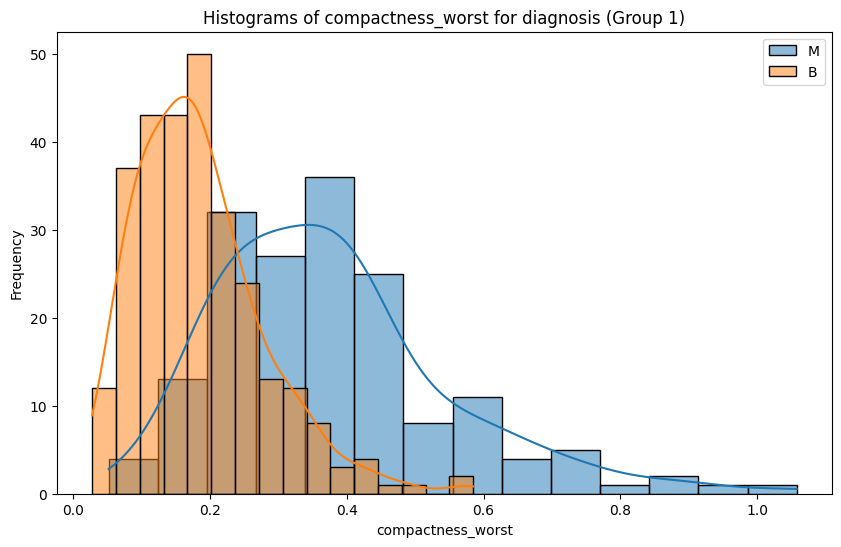

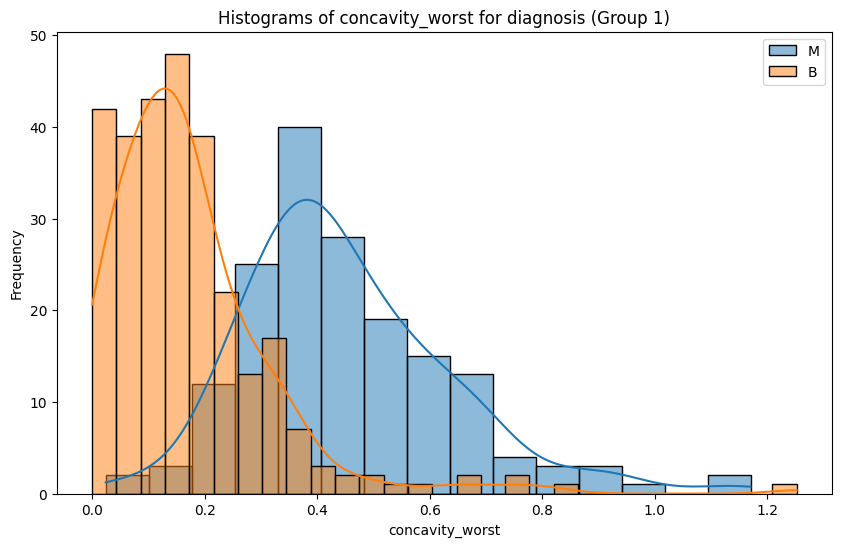

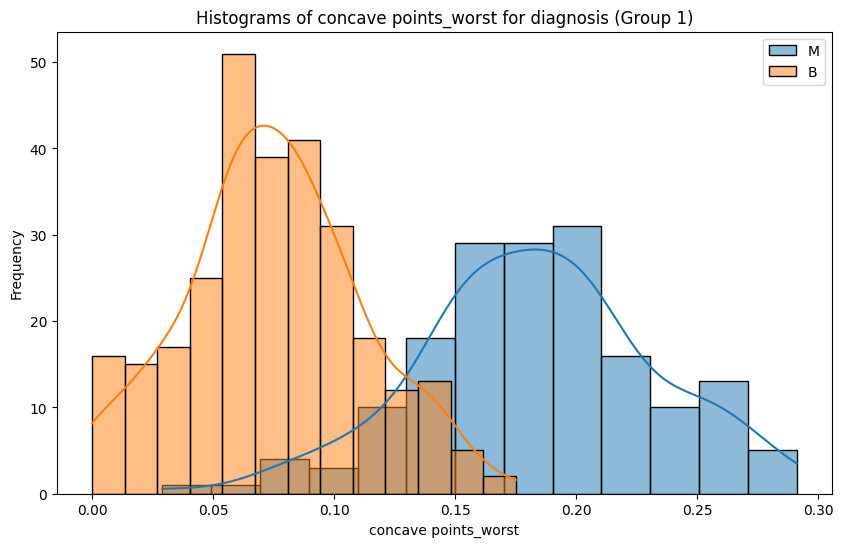

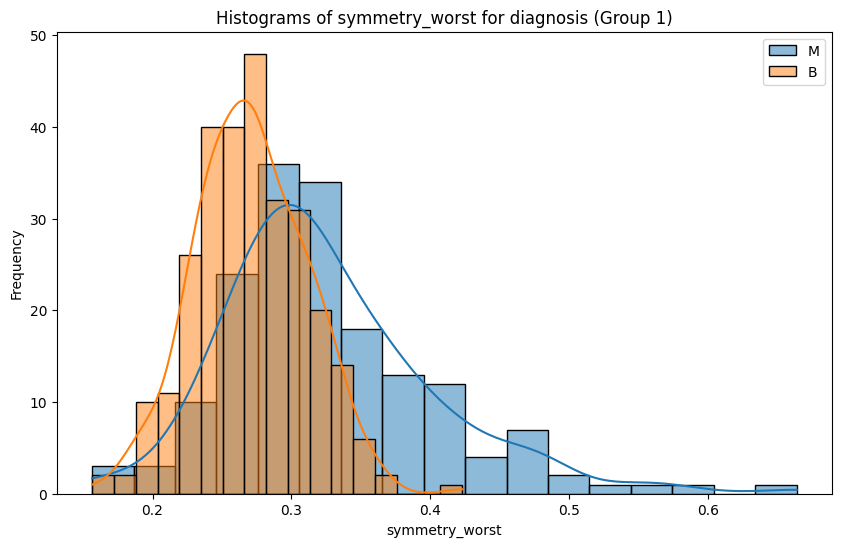

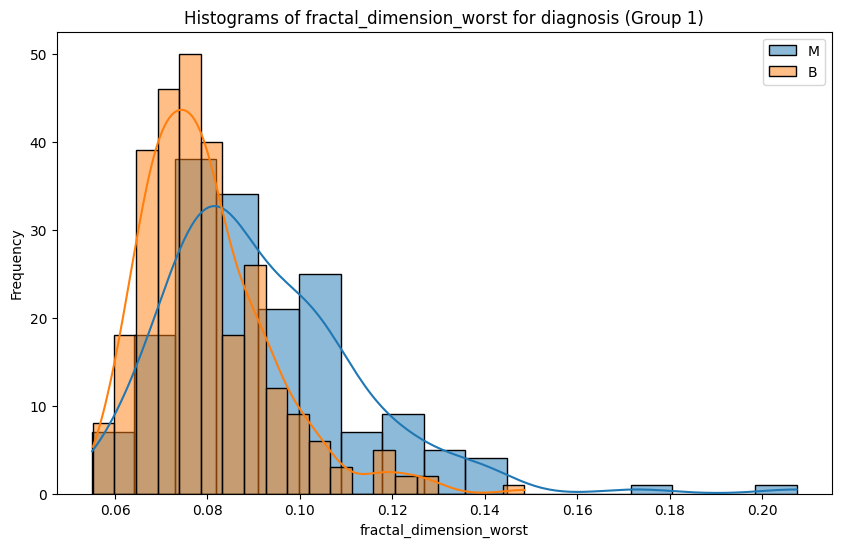

In [9]:
for valor in features:
    bt.plot_grouped_histograms(train_set, target, valor, group_size=2)


In [10]:
features_3 = ['texture_se','smoothness_se',]
features_2 = ['fractal_dimension_se', 'symmetry_se']

In [11]:
features_1 = [col for col in features if not (col in features_2 + features_3)]

In [12]:
print (features_1)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

<Axes: >

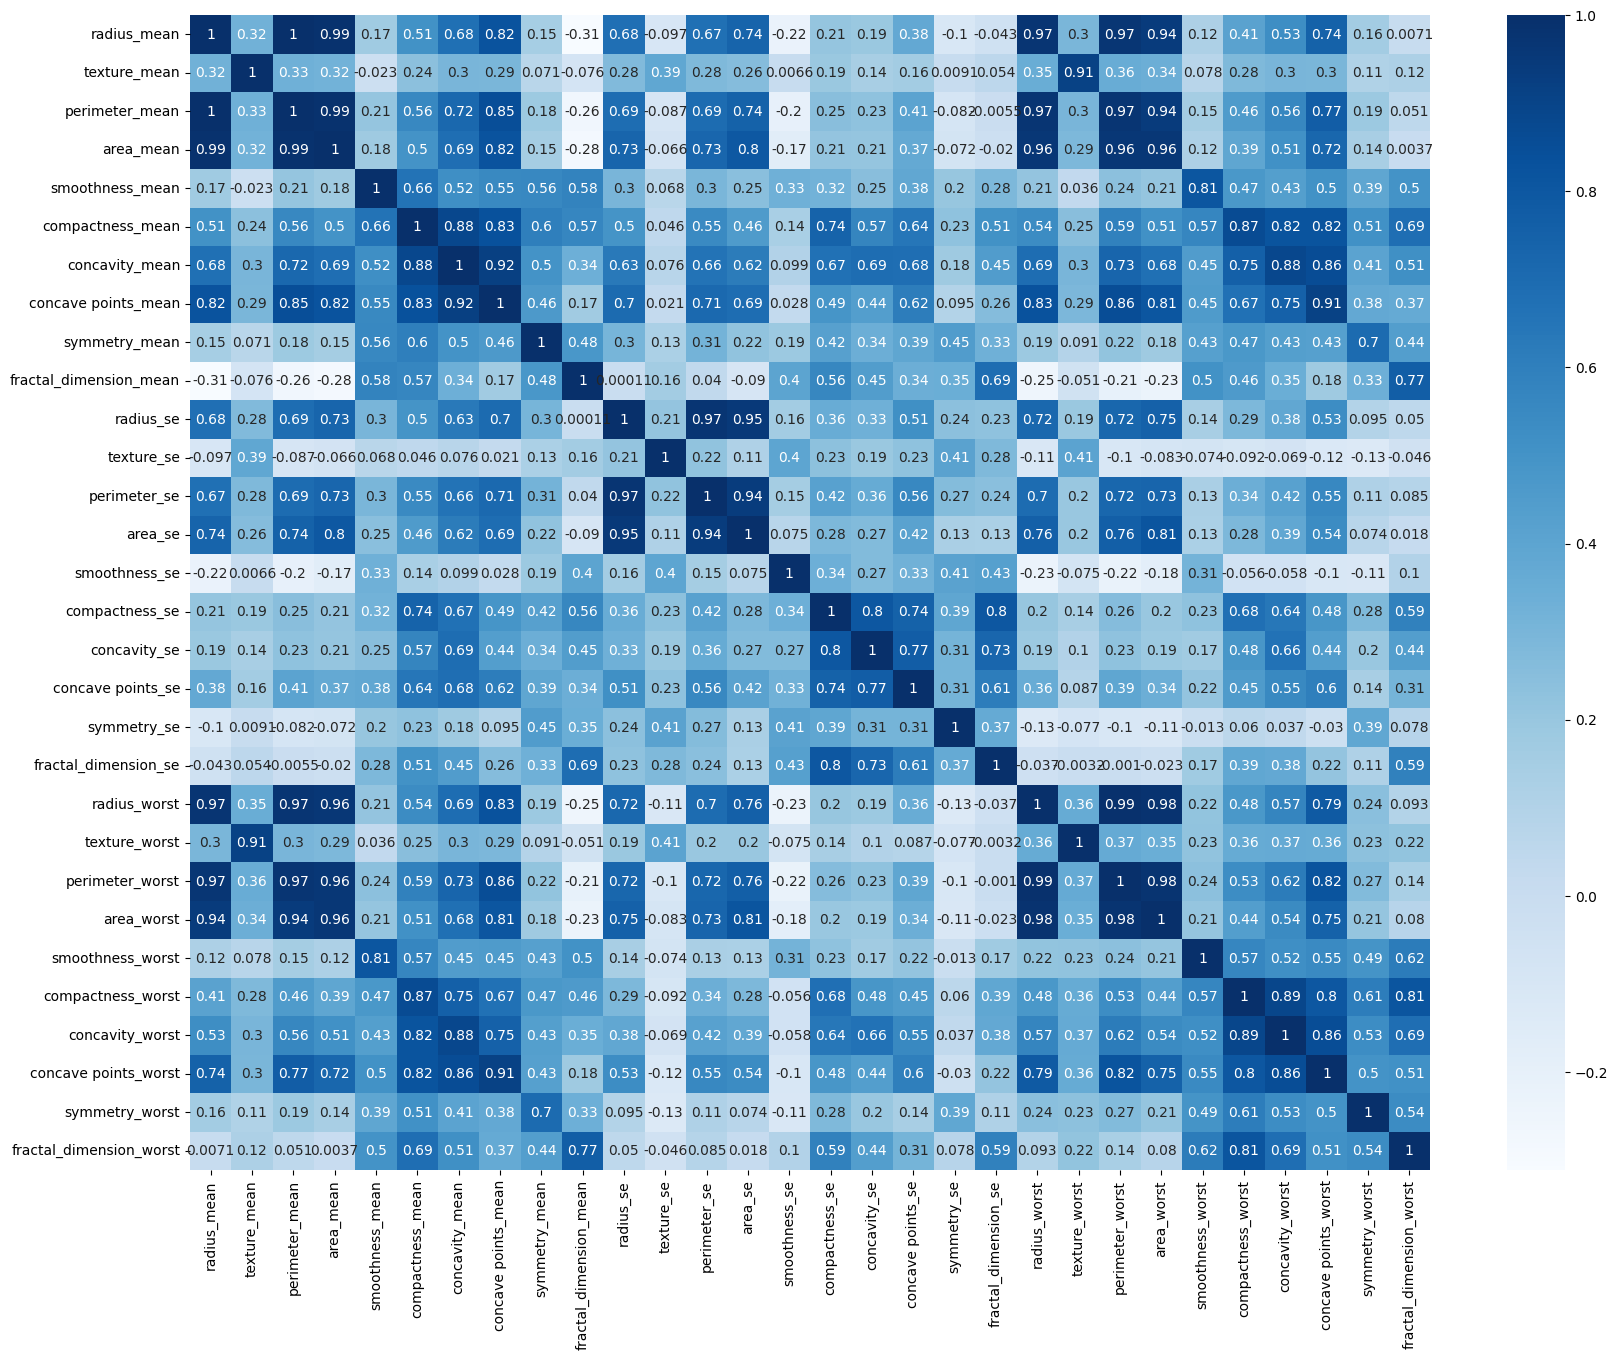

In [13]:
corr= df[features].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot= True, cmap= "Blues")

Hay varias variables que tienen entre si una correlacion de mas de 90%, en todas sus tipos _mean , _ se, y _worst. Por ejemplo: radius, perimeter y area. Lo cual es logico pues perimeter y area son una funcion de radius.

In [14]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [15]:
X_train = train_set.drop(columns=target)
y_train = train_set[target]
X_test = test_set.drop(columns=target)
y_test = test_set[target]

In [16]:
rf_clf = RandomForestClassifier(max_depth=5, random_state= 42)
metrica = cross_val_score(rf_clf, X_train, y_train, cv = 5, scoring = "balanced_accuracy")
metrica_base = np.mean(metrica)
print(f"Metrica base: {metrica_base}")


Metrica base: 0.9506707946336428


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

radius_mean, perimeter_mean, area_mean ---> radius_mean

radius_se, perimeter_se, area_se ---> radius_se

radius_worst, perimeter_worst, area_worst ---> radius_worst

compactness_mean, concavity_mean,	concave points_mean ---> concave points_mean

compactness_se, concavity_se,	concave points_se ---> concave points_se

compactness_worst, concavity_worst,	concave points_worst ---> concave points_worst

symetry_worst, symetry_mean ---> symetry_mean

fractal_dimension_mean, fractal_dimension_worst ---> fractal_dimension_mean

'radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean' correlan con su correspondiente _worst ---> nos quedamos con las _mean

In [18]:
feat_out = ['perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean',
            'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
            'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
            'fractal_dimension_worst', 'symmetry_worst',
            'radius_worst', 'texture_worst', 'smoothness_worst', 'concave points_worst']

In [19]:
feat_in = [col for col in features if col not in feat_out  ]

<Axes: >

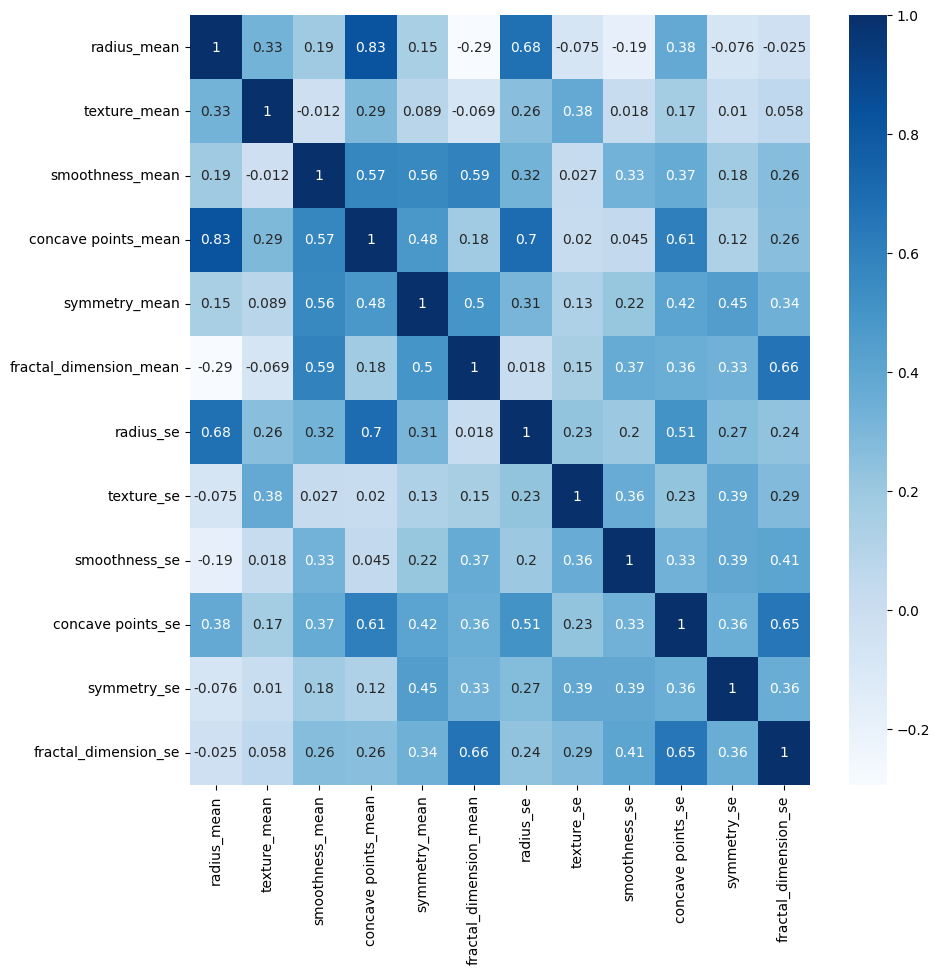

In [20]:
corr= X_train[feat_in].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot= True, cmap= "Blues")

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [21]:
rf_clf_2 = RandomForestClassifier(max_depth=5, random_state= 42)
metrica = cross_val_score(rf_clf_2, X_train[feat_in], y_train, cv = 5, scoring = "balanced_accuracy")
metrica_2 = np.mean(metrica)

In [22]:
print(f"Metrica con {len(feat_in)} features: {metrica_2}")
print(f"Metrica base con {len(features)} features: {metrica_base}")

Metrica con 12 features: 0.9347781217750258
Metrica base con 30 features: 0.9506707946336428


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [23]:
'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial y desarrollada por Fisher en 1930,
constituye la herramienta básica para el estudio del efecto de uno o más factores (cada uno con dos o más niveles) sobre
la media de una variable continua. Es por lo tanto el test estadístico a emplear cuando se desea comparar las medias de
dos o más grupos.
'''
#features_num.remove("quality")
#X_train = df_wines[features_num]
#y_train = df_wines["class"]
selector = SelectKBest(f_classif, k=12)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,16.02,102.70,797.8,0.06669,0.03299,0.03323,19.19,123.80,1150.0,0.15510,0.14590,0.09975
1,12.32,78.85,464.1,0.06981,0.03987,0.03700,13.50,86.97,549.1,0.12660,0.12420,0.09391
2,12.85,82.63,514.5,0.08316,0.06126,0.01867,14.40,91.63,645.8,0.19360,0.18380,0.05601
3,14.90,102.10,685.0,0.22250,0.27330,0.09711,16.35,125.40,832.7,0.70900,0.90190,0.24750
4,18.61,122.10,1094.0,0.10660,0.14900,0.07731,21.31,139.90,1403.0,0.21170,0.34460,0.14900
...,...,...,...,...,...,...,...,...,...,...,...,...
450,13.03,82.61,523.8,0.03766,0.02562,0.02923,13.30,84.46,545.9,0.04619,0.04833,0.05013
451,11.89,76.39,433.8,0.08120,0.02555,0.02179,13.05,85.09,522.9,0.21870,0.11640,0.08263
452,13.00,82.61,520.2,0.05073,0.01206,0.01762,14.34,91.06,628.5,0.10930,0.04462,0.05921
453,14.20,92.41,618.4,0.11080,0.05063,0.03058,16.45,112.10,828.5,0.34290,0.25120,0.13390


In [24]:

rf_clf_3 = RandomForestClassifier(max_depth=5, random_state= 42)
features_3 = selector.get_feature_names_out()
metrica = cross_val_score(rf_clf_3, X_train[features_3], y_train, cv = 5, scoring = "balanced_accuracy")
metrica_3 = np.mean(metrica)

In [25]:
print(f"Metrica base con {len(features)} features: {metrica_base}")
print(f"Metrica con {len(feat_in)} features: {metrica_2}  Selección Visual")
print(f"Metrica con {len(features_3)} features: {metrica_3}  Selección ANOVA")

Metrica base con 30 features: 0.9506707946336428
Metrica con 12 features: 0.9347781217750258  Selección Visual
Metrica con 12 features: 0.9412796697626419  Selección ANOVA


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [26]:
rf_RFE = RandomForestClassifier(max_depth=5, random_state= 42)

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, random_state=42),
    n_features_to_select=5)

In [27]:
print(rfe.ranking_)

[ 5 11  6  2 14 16  3  1 22 23 15 21 12 13 24 25 19 26 20 18  1  4  1  1
 10  9  8  1  7 17]


In [28]:
feat_rfe = []
for i, col in enumerate(X_train.columns):
    if rfe.ranking_[i] == 1:
        feat_rfe.append(col)
feat_rfe          

['concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [29]:
rf_clf_4 = RandomForestClassifier(max_depth=5, random_state= 42)

metrica = cross_val_score(rf_clf_4, X_train[feat_rfe], y_train, cv = 5, scoring = "balanced_accuracy")
metrica_4 = np.mean(metrica)

In [30]:
print(f"Metrica base con {len(features)} features: {metrica_base}")
print(f"Metrica con {len(feat_in)} features: {metrica_2}  Selección Visual")
print(f"Metrica con {len(features_3)} features: {metrica_3}  Selección ANOVA")
print(f"Metrica con {len(feat_rfe)} features: {metrica_4}  Selección RFE")

Metrica base con 30 features: 0.9506707946336428
Metrica con 12 features: 0.9347781217750258  Selección Visual
Metrica con 12 features: 0.9412796697626419  Selección ANOVA
Metrica con 5 features: 0.9353973168214654  Selección RFE


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [31]:
rf_selector = RandomForestClassifier(max_depth=5, random_state= 42)
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(max_depth=5, random_state=42),
                threshold='median')

In [ ]:
selector_model.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype=object)

In [33]:
rf_clf.fit(X_train,y_train)
print(f"Importancia con el modelo base {rf_clf.feature_importances_}")

Importancia con el modelo base [0.05943698 0.01480272 0.07753239 0.04494654 0.00407021 0.0119664
 0.05164326 0.08370919 0.00421216 0.00400717 0.01645629 0.00353164
 0.00802598 0.02270771 0.00232461 0.00508685 0.00509278 0.00187549
 0.00314385 0.00506388 0.10037092 0.01598315 0.08762878 0.15291461
 0.01475063 0.01588543 0.03072205 0.13454641 0.01135085 0.00621109]


In [ ]:
lr_clf = LogisticRegression(max_iter = 1000)
feat_sfm = selector_model.get_feature_names_out()
metrica = cross_val_score(lr_clf, X_train[feat_sfm], y_train, cv = 5, scoring = "balanced_accuracy")
metrica_5 = np.mean(metrica)

In [36]:
print(f"Metrica base con {len(features)} features: {metrica_base}")
print(f"Metrica con {len(feat_in)} features: {metrica_2}  Selección Visual")
print(f"Metrica con {len(features_3)} features: {metrica_3}  Selección ANOVA")
print(f"Metrica con {len(feat_rfe)} features: {metrica_4}  Selección RFE")
print(f"Metrica con {len(feat_sfm)} features: {metrica_5}  Selección SFM y regresion logística")

Metrica base con 30 features: 0.9506707946336428
Metrica con 12 features: 0.9347781217750258  Selección Visual
Metrica con 12 features: 0.9412796697626419  Selección ANOVA
Metrica con 5 features: 0.9353973168214654  Selección RFE
Metrica con 15 features: 0.9465428276573787  Selección SFM y regresion logística


In [49]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median", max_features= 5) # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, random_state=42),
                max_features=5, threshold='median')

In [50]:
feat_sfm_6 = selector_model.get_feature_names_out()

In [51]:
feat_sfm_6

array(['concave points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'], dtype=object)

In [52]:
feat_sfm_6 = selector_model.get_feature_names_out()
metrica = cross_val_score(lr_clf, X_train[feat_sfm_6], y_train, cv = 5, scoring = "balanced_accuracy")
metrica_6 = np.mean(metrica)

In [53]:
print(f"Metrica base con {len(features)} features: {metrica_base}")
print(f"Metrica con {len(feat_in)} features: {metrica_2}  Selección Visual")
print(f"Metrica con {len(features_3)} features: {metrica_3}  Selección ANOVA")
print(f"Metrica con {len(feat_rfe)} features: {metrica_4}  Selección RFE")
print(f"Metrica con {len(feat_sfm)} features: {metrica_5}  Selección SFM y regresion logística")
print(f"Metrica con {len(feat_sfm_6)} features: {metrica_6}  Selección SFM limitado a 5 y regresion logística")

Metrica base con 30 features: 0.9506707946336428
Metrica con 12 features: 0.9347781217750258  Selección Visual
Metrica con 12 features: 0.9412796697626419  Selección ANOVA
Metrica con 5 features: 0.9353973168214654  Selección RFE
Metrica con 15 features: 0.9465428276573787  Selección SFM y regresion logística
Metrica con 5 features: 0.9148606811145511  Selección SFM limitado a 5 y regresion logística


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.